# Convolutional Neural Network for Malaria Cell Images 

In [1]:
# import dependencies
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import seaborn
from keras.models import Sequential
from keras.layers import Convolution2D,MaxPooling2D,Dropout,Dense,Flatten,BatchNormalization,Conv2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
from keras.callbacks import ModelCheckpoint
%matplotlib inline
import glob
import cv2

Using TensorFlow backend.


In [2]:
# read in malaria cell images
infected = glob.glob('cell_images_subset/Parasitized/*.png')
uninfected = glob.glob('cell_images_subset/Uninfected/*.png')

In [3]:
# 5,000 infected images and 5,000 uninfected images
print(f"{len(infected)} infected cell images")
print(f"{len(uninfected)} uninfected cell images")
print(f"Shape of first infected cell image: {cv2.imread(infected[0]).shape}")
print(f"Shape of first uninfected cell image: {cv2.imread(uninfected[0]).shape}")

5000 infected cell images
5000 uninfected cell images
Shape of first infected cell image: (148, 142, 3)
Shape of first uninfected cell image: (139, 160, 3)


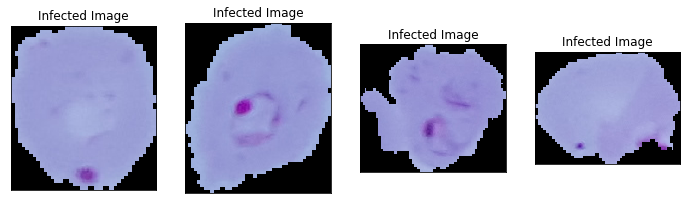

In [4]:
# exhibit 4 sample images of infected cells
plt.figure(figsize=(12,5))
for i in range(1,5):
    plt.subplot(1,4,i)
    value = np.random.randint(100)
    image = cv2.imread(infected[value])
    plt.imshow(image)
    plt.title('Infected Image')
    plt.xticks([])
    plt.yticks([])

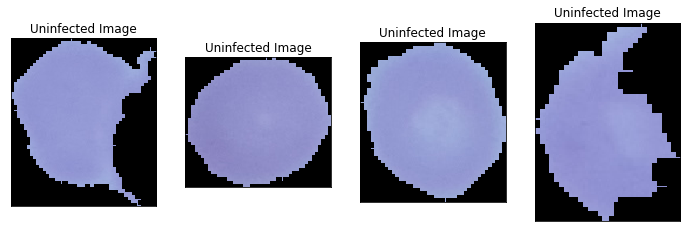

In [5]:
# exhibit 4 sample images of uninfected cells
plt.figure(figsize=(12,5))
for i in range(1,5):
    plt.subplot(1,4,i)
    value = np.random.randint(100)
    image = cv2.imread(uninfected[value])
    plt.imshow(image)
    plt.title('Uninfected Image')
    plt.xticks([])
    plt.yticks([])

In [62]:
# The original images consist in RGB coefficients in the 0-255, but such values would be too high for our model to process
# (given a typical learning rate), so we target values between 0 and 1 instead by scaling with a 1/255
augmentor = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [63]:
# create the training and testing datasets
train_generator = augmentor.flow_from_directory('cell_images_subset/', batch_size=32,
                                                target_size = (96,96), class_mode = 'binary', subset = 'training')
test_generator = augmentor.flow_from_directory('cell_images_subset/', batch_size=32, target_size=(96,96),
                                               class_mode='binary', subset='validation')

Found 9000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [109]:
train_generator

In [64]:
model1 = Sequential()
model1.add(Convolution2D(32,(3,3),activation='relu',input_shape = (96,96,3)))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.4))

model1.add(Convolution2D(32,(3,3),activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.4))
model1.add(Convolution2D(64,(3,3),activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPooling2D(2,2))
model1.add(Dropout(0.4))
model1.add(Flatten())

model1.add(Dense(64,activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [55]:
# model1 = Sequential()
# model1.add(Convolution2D(32,(6,6), strides=3, activation='relu',input_shape = (96,96,3)))

# batch normalization allows each layer of a network to learn by itself a little bit more independently of other layers
# # reduces overfitting
# model1.add(BatchNormalization())

# # max pooling helps with overfitting by reducing sample's dimensionality and allowing for assumptions 
# # to be made about features contained in the sub-regions binned
# model1.add(MaxPooling2D(6,6))

# # dropout keeps a certain proportion of nodes from being used each go around (help prevent overfitting)
# model1.add(Dropout(0.3))

# model1.add(Convolution2D(32,(6,6), strides=3, activation='relu'))
# model1.add(BatchNormalization())
# model1.add(MaxPooling2D(6,6))
# model1.add(Dropout(0.3))

# model1.add(Convolution2D(32,(6,6), strides=3, activation='relu'))
# model1.add(BatchNormalization())
# model1.add(MaxPooling2D(6,6))
# model1.add(Dropout(0.3))

# # flatten changes the dimensions of the data to make it an input layer for the artificial neural network
# model1.add(Flatten())

# # A dense layer is used to change the dimensions of the vector. 
# # Mathematically speaking, it applies a rotation, scaling, translation transform to the vector.
# model1.add(Dense(32, activation='relu'))
# model1.add(Dropout(0.3))

# # The Sigmoid function takes any range real number and returns the output value which falls in the range of 0 to 1.
# model1.add(Dense(1, activation='sigmoid'))

In [56]:
# compile the model
# model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [65]:
# show summary of model
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 94, 94, 32)        896       
_________________________________________________________________
batch_normalization_14 (Batc (None, 94, 94, 32)        128       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 47, 47, 32)        0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 47, 47, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 45, 45, 32)        9248      
_________________________________________________________________
batch_normalization_15 (Batc (None, 45, 45, 32)        128       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 22, 22, 32)        0         
__________

In [59]:
# fit the model
# history_custom = model1.fit_generator(train_generator,steps_per_epoch=200,
#                               epochs = 5,validation_data=test_generator,validation_steps=64)

In [108]:
# history_custom = model1.fit_generator(train_generator, steps_per_epoch=100,
#                               epochs = 5,validation_data=test_generator, validation_steps=10)

In [61]:
model1.save("Malaria_CNN_Trained1.h5")

In [67]:
model2 = Sequential()
model2.add(Convolution2D(32,(3,3),activation='relu',input_shape = (96,96,3)))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.4))

model2.add(Convolution2D(64,(3,3),activation='relu'))
model2.add(BatchNormalization())
model2.add(MaxPooling2D(2,2))
model2.add(Dropout(0.4))
# model2.add(Convolution2D(32,(3,3),activation='relu'))
# model2.add(BatchNormalization())
# model2.add(MaxPooling2D(2,2))
# model2.add(Dropout(0.4))

model2.add(Flatten())

model2.add(Dense(64,activation='relu'))
model2.add(Dropout(0.4))
model2.add(Dense(1,activation='sigmoid'))
model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# model2.summary()

history_custom2 = model2.fit_generator(train_generator, steps_per_epoch=100,
                              epochs = 5,validation_data=test_generator, validation_steps=10)

Epoch 1/5
100/100 [==============================] - 347s 3s/step - loss: 1.8168 - acc: 0.6213 - val_loss: 0.6542 - val_acc: 0.6125
Epoch 2/5
100/100 [==============================] - 219s 2s/step - loss: 0.6104 - acc: 0.6806 - val_loss: 0.6138 - val_acc: 0.6875
Epoch 3/5
100/100 [==============================] - 199s 2s/step - loss: 0.5901 - acc: 0.6866 - val_loss: 1.1336 - val_acc: 0.6453
Epoch 4/5
100/100 [==============================] - 191s 2s/step - loss: 0.5582 - acc: 0.7153 - val_loss: 0.5596 - val_acc: 0.7500
Epoch 5/5
100/100 [==============================] - 190s 2s/step - loss: 0.5576 - acc: 0.7206 - val_loss: 1.5198 - val_acc: 0.5594


In [68]:
model2.save("Malaria_CNN_Trained2.h5")

In [70]:
model3 = Sequential()
model3.add(Convolution2D(32,(3,3),activation='relu',input_shape = (96,96,3)))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.4))

model3.add(Convolution2D(64,(3,3),activation='relu'))
model3.add(BatchNormalization())
model3.add(MaxPooling2D(2,2))
model3.add(Dropout(0.4))
# model2.add(Convolution2D(32,(3,3),activation='relu'))
# model2.add(BatchNormalization())
# model2.add(MaxPooling2D(2,2))
# model2.add(Dropout(0.4))

model3.add(Flatten())

model3.add(Dense(32,activation='relu'))
model3.add(Dropout(0.4))
model3.add(Dense(1,activation='sigmoid'))
model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

# model2.summary()

history_custom3 = model3.fit_generator(train_generator, steps_per_epoch=100,
                              epochs = 5,validation_data=test_generator, validation_steps=10)

Epoch 1/5
100/100 [==============================] - 190s 2s/step - loss: 1.8626 - acc: 0.5925 - val_loss: 0.8461 - val_acc: 0.6062
Epoch 2/5
100/100 [==============================] - 189s 2s/step - loss: 0.6667 - acc: 0.6153 - val_loss: 0.7140 - val_acc: 0.5642
Epoch 3/5
100/100 [==============================] - 201s 2s/step - loss: 0.6530 - acc: 0.6156 - val_loss: 0.6482 - val_acc: 0.6562
Epoch 4/5
100/100 [==============================] - 189s 2s/step - loss: 0.6621 - acc: 0.6169 - val_loss: 0.7333 - val_acc: 0.6062
Epoch 5/5
100/100 [==============================] - 190s 2s/step - loss: 0.6449 - acc: 0.6281 - val_loss: 0.7231 - val_acc: 0.6993


In [71]:
model3.save("Malaria_CNN_Trained3.h5")

In [88]:
from keras.models import load_model
import os
from keras.preprocessing import image
from keras.applications.vgg19 import (
    VGG19, 
    preprocess_input, 
    decode_predictions
)


In [118]:
Malaria_CNN_Model = load_model("Malaria_CNN_Trained3.h5")

In [92]:
image_size = (96, 96)

In [135]:
def predict(image_path):
    """Use VGG19 to label image"""
    img = image.load_img(image_path, target_size=image_size)
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    prediction = Malaria_CNN_Model.predict(x).round()
    
    plt.imshow(img)
    
    if prediction == 1:
        print('Predicted: Infected')
    else:
        print('Predicted: Uninfected')

Predicted: Infected


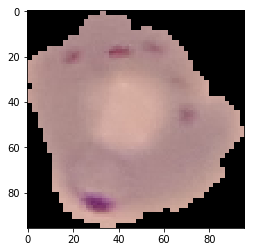

In [141]:
image_path = os.path.join("cell_images", "Parasitized", "C39P4thinF_original_IMG_20150622_105554_cell_9.png")

predict(image_path)

In [142]:
import tensorflowjs as tfjs

ModuleNotFoundError: No module named 'tensorflowjs'